In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\michi\Documents\movie\ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [4]:
movieId_grouped = df.groupby('movieId')

In [5]:
mean_rating = movieId_grouped.agg(Mean = ('rating','mean'),  Count = ('rating', 'count')).sort_values('Mean', ascending=False)
mean_rating.sort_values('Mean', ascending=False)

,Mean,Count
movieId,,
147966,5.0,1
169232,5.0,1
114193,5.0,1
168644,5.0,1
151589,5.0,1
...,...,...
169240,0.5,1
150148,0.5,2
150152,0.5,1


In [6]:
mean_vote_all_movies = mean_rating['Count'].mean()
mean_vote_all_movies

576.8433780339134

In [21]:
v = mean_rating["Count"]
m = 10
r = mean_rating["Mean"]
c = mean_vote_all_movies
mean_rating['weightedRating1'] = (v/(v+m))*r+(m/(v+m))*c
mean_rating.sort_values('weightedRating1', ascending=False) #sort count or mean, PROBLEM:  LOW COUNT -> HIGH RATING OVER 5

,Mean,Count,weightedRating1,weightedRating2
movieId,,,,
147966,5.000000,1,524.857616,5.099502
145939,5.000000,1,524.857616,5.099502
138568,5.000000,1,524.857616,5.099502
169304,5.000000,1,524.857616,5.099502
169316,5.000000,1,524.857616,5.099502
...,...,...,...,...
173,2.534723,16819,2.875984,2.585289
19,2.633983,24212,2.871044,2.686524
3593,1.607782,4806,2.802208,1.639886


In [8]:
mean_rating.loc[(mean_rating["Count"] >= 100)].sort_values("weightedRating1", ascending=False) #PROBLEM LOW VOTES STILL BETTER RATING THEN HIGHER VOTES

,Mean,Count,weightedRating1
movieId,,,
140265,4.110000,100,56.176671
96373,3.765000,100,55.863034
6644,3.750000,100,55.849398
54229,3.680000,100,55.785762
26169,3.680000,100,55.785762
...,...,...,...
173,2.534723,16819,2.875984
19,2.633983,24212,2.871044
3593,1.607782,4806,2.802208


In [23]:
mean_rating.loc[(mean_rating.index == 65)]

,Mean,Count,weightedRating1
movieId,,,
65,2.40334,5778,3.395807


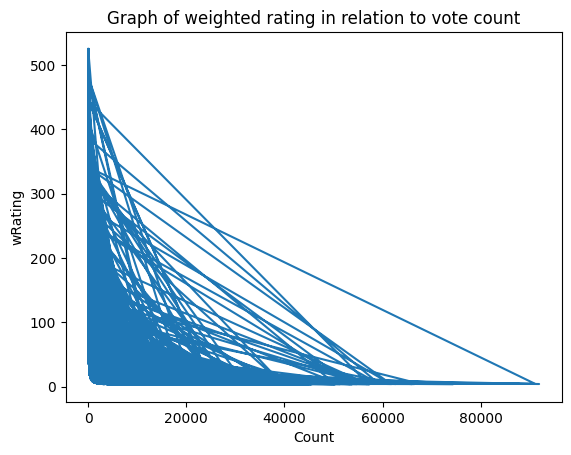

In [9]:
plt.plot(mean_rating['Count'], mean_rating['weightedRating1'])
plt.xlabel("Count")
plt.ylabel("wRating")
plt.title("Graph of weighted rating in relation to vote count")
plt.show()

In [13]:
mean_rating2 = mean_rating
p = mean_rating2["Mean"]
q = mean_rating2["Count"]
Q = 500
mean_rating2["weightedRating2"] = p + 10*(1-np.exp(-(p/Q)))

In [14]:
mean_rating2.sort_values("Count", ascending=False)

,Mean,Count,weightedRating1,weightedRating2
movieId,,,,
356,4.052926,91921,4.115232,4.133657
318,4.429015,91082,4.491854,4.517204
296,4.169975,87901,4.235118,4.253028
593,4.152246,84078,4.220352,4.234947
2571,4.154098,77960,4.227548,4.236836
...,...,...,...,...
161688,3.000000,1,524.675798,3.059820
162910,3.000000,1,524.675798,3.059820
162884,3.000000,1,524.675798,3.059820


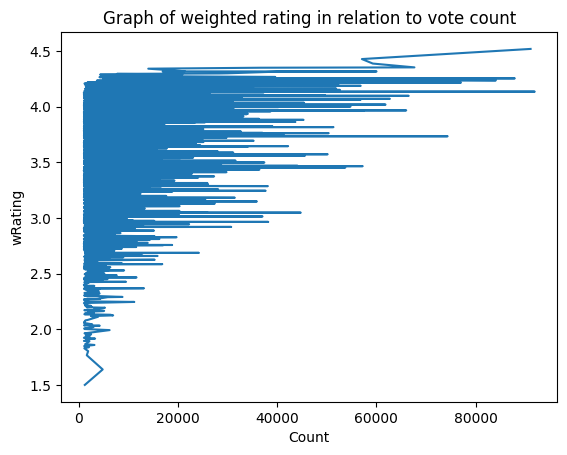

In [15]:
mean_rating_testing = mean_rating2.loc[mean_rating2["Count"] >= 1000]
plt.plot(mean_rating_testing['Count'], mean_rating_testing['weightedRating2'])
plt.xlabel("Count")
plt.ylabel("wRating")
plt.title("Graph of weighted rating in relation to vote count")
plt.show()

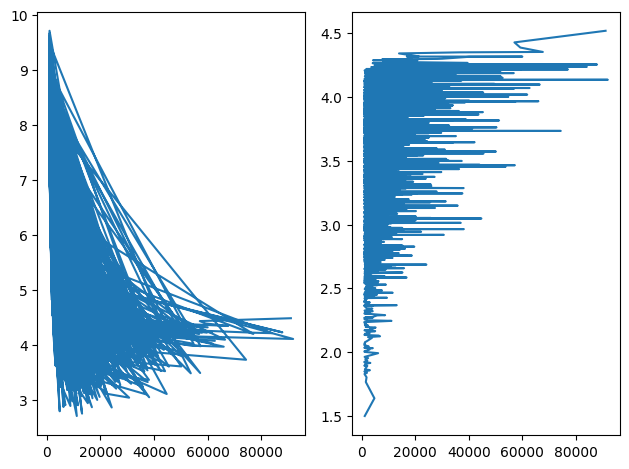

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(mean_rating_testing['Count'], mean_rating_testing['weightedRating1'])
axes[1].plot(mean_rating_testing['Count'], mean_rating_testing['weightedRating2'])
fig.tight_layout()

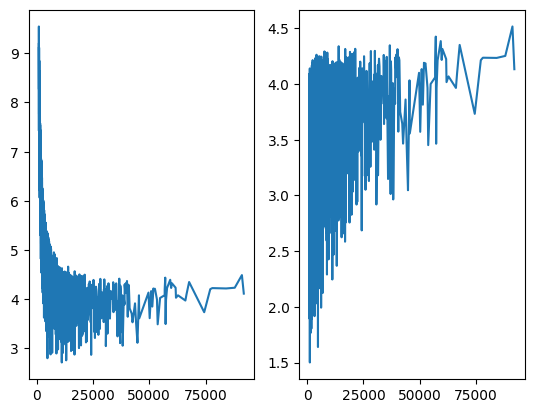

In [18]:
mean_rating_testing2 = mean_rating_testing.groupby("Count").mean()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(mean_rating_testing2.index, mean_rating_testing2['weightedRating1'])

axes[1].plot(mean_rating_testing2.index, mean_rating_testing2['weightedRating2'])


In [22]:
df.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [19]:
mean_rating_testing

,Mean,Count,weightedRating1,weightedRating2
movieId,,,,
318,4.429015,91082,4.491854,4.517204
858,4.339811,57070,4.440109,4.426231
50,4.300189,59271,4.396770,4.385824
527,4.266531,67662,4.351141,4.351498
1221,4.263475,36679,4.419538,4.348382
...,...,...,...,...
1595,1.794333,1094,7.003110,1.830155
6482,1.768943,1874,4.821356,1.804260
2555,1.732791,1598,5.309349,1.767387


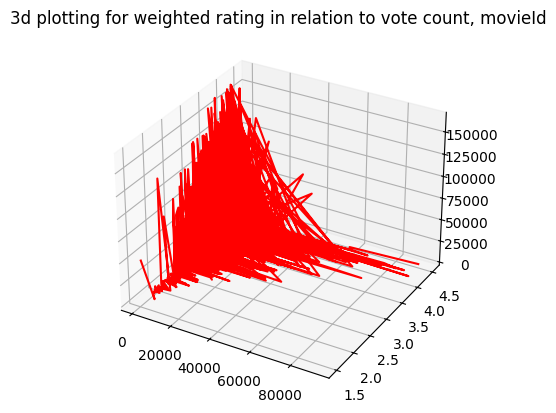

In [20]:
fig1 = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = mean_rating_testing.index
x = mean_rating_testing["Count"]
y = mean_rating_testing["weightedRating2"]
 
# plotting
ax.plot3D(x, y, z, 'red')
ax.set_title('3d plotting for weighted rating in relation to vote count, movieId')
plt.show()